<h1><b> Exploratory Data Analysis on Haberman's Dataset <b><h1>


<b>Description of Haberman Dataset :</b> The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

<b>Objective :</b> To predict whether the patient would survive from breast cancer for more than 5 years or not based on the given 3 attributes :
1. Age of the patient
2. Year of operation
3. Number of positive auxillary nodes detected

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#Here we are loading the Haberman's dataset(haberman.csv) into a pandas dataframe
haberman = pd.read_csv("/content/sample_data/haberman.csv")


In [ ]:
haberman.head()    #shows the first 5 rows of the dataset

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


The 4th column name is "status" wherein we have two values , the value 1 corresponds to the patients which survived more the 5 years after the surgery and the value 2 determines the patients which did survived less than 5 years after the surgery.
We take the "status" as our class label to predict, given the other three features.

In [ ]:
haberman.shape   #number of datapoints and features

(306, 4)

In [ ]:
haberman.columns  #shows the column names of the dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [ ]:
haberman["status"].value_counts()    #This shows that the haberman's dataset is an imbalanced dataset

1    225
2     81
Name: status, dtype: int64

Here we can see that the number of patients that survived more than 5 years after the surgery are 225 out of 306 ie. they have "status" as 1 whereas, the number of patients that survived less than 5 years are 81 out of 306 ie. they have "status" as 2.

<h2>2-D Scatter Plot<h2>

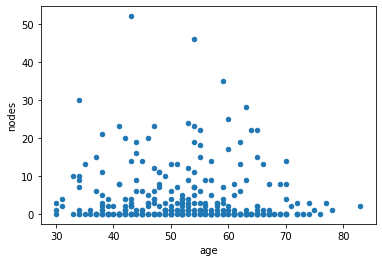

In [ ]:
#here we take 'age' and 'nodes'  features as my axis to plot a 2-D scatter plot

haberman.plot(kind='scatter',x='age',y='nodes');   #make a plot of the dataframe
plt.show()

Here we can see we cannot make much sense out of it as all the points are colored blue.
To resolve it we can use seaborn as it provides color coding facility

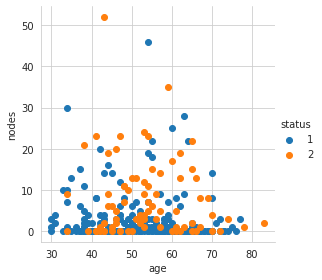

In [ ]:
sns.set_style("whitegrid");    #sns corresponds to seaborn
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter,"age","nodes").add_legend()
plt.show()

Here we cannot make much sense out of the data as the blue and orange dots are not easily seperable. 
Here we used 'age' and 'nodes' features as our axis, we can use other features combinations as well to build multiple 2-D scatter plots to determine our best features.
Building multiple 2-D plots would be a lengthy process so we can use another alternative called <b>Pair-Plot</b> 

<h2>Pair-Plot</h12>

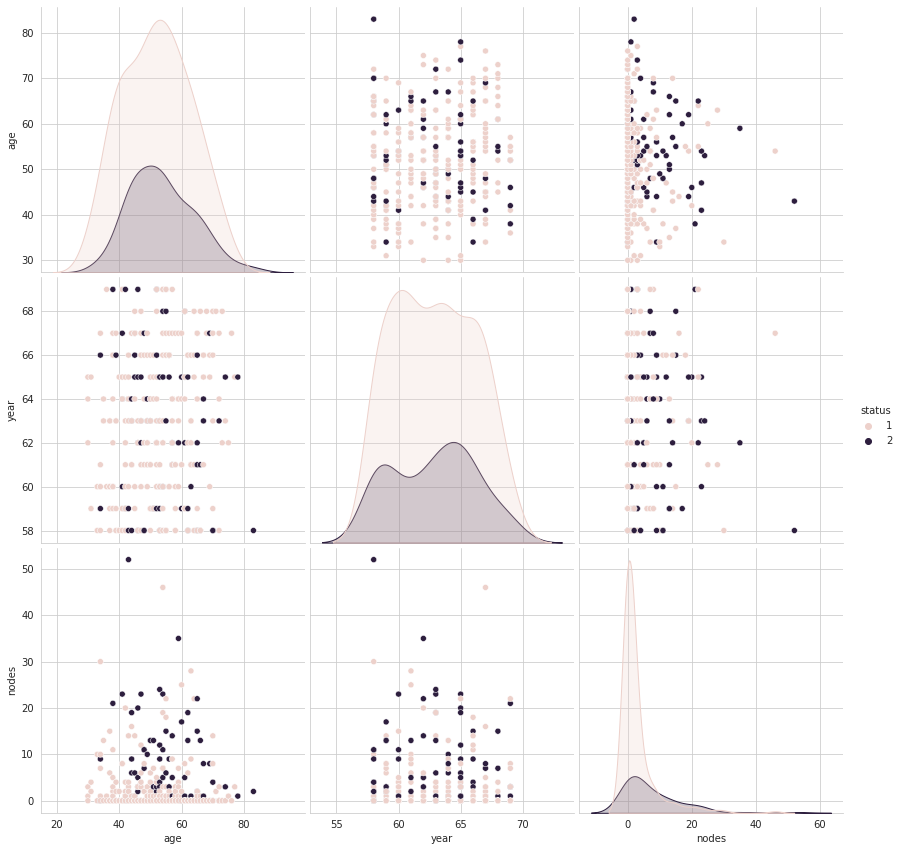

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",height=4)
plt.show()

The diagonal plots are pdfs for each feature. The plots above and below the diagonals are inverted plots of each other.
As we can see here, it is very hard to distinguish given any 2 features.
Therefore, we will shift our focus to 1-D plotting or in other words we will do univariate analysis.

<h1>Histograms,PDF,CDF</h1>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


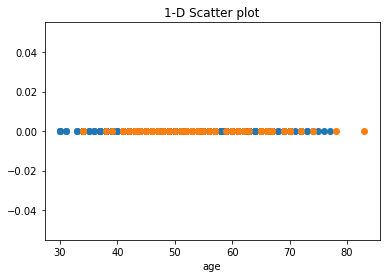

In [ ]:
#Here we will make a 1-D scatter plot of age feature
haberman.status_1 = haberman.loc[haberman['status']==1]
haberman.status_2 = haberman.loc[haberman['status']==2]
plt.plot(haberman.status_1['age'],np.zeros_like(haberman.status_1['age']),'o')
plt.plot(haberman.status_2['age'],np.zeros_like(haberman.status_2['age']),'o')
plt.xlabel('age')
plt.title("1-D Scatter plot")
plt.show()

Here we can see it is very hard to make sense as the points are overlapping a lot.
An alternative to this problem is to draw the PDF and CDF for it.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


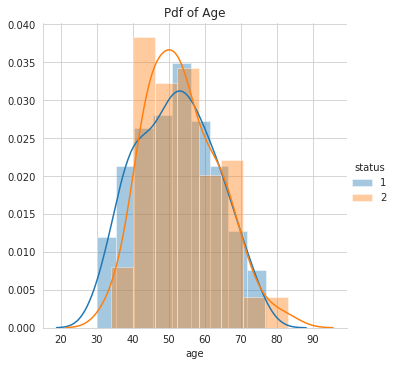

In [ ]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.distplot,'age').add_legend();
plt.title('Pdf of Age')
plt.show()

Observations :  From the above graph we can come to few observvations -

1.  Patients with age less than 40 has more chances of survival
2.  The survival chances for patients with age between 40 to 60 are less.
3.  There are equal chances of survival and non-survival for patients with age between 60 to 76.
4.  The patients with age greater than 76 has lesser chances of survival.

---



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


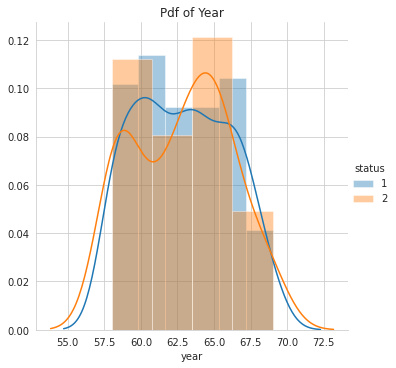

In [ ]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.distplot,'year').add_legend();
plt.title('Pdf of Year')
plt.show()

Observation : There is a lot overlap and hence this graph is not as useful but we can vaguely come to certain observations-

1.   Most of the surgeries went successful between 1958 to 1962.
2.   Whereas the number of deaths between 1963 to 1966 were higher.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


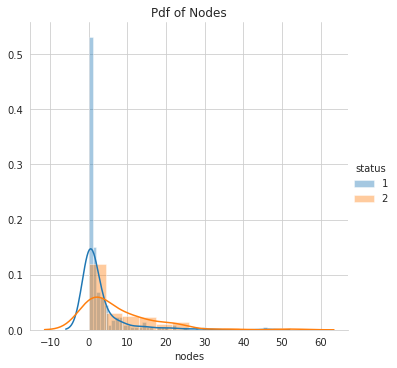

In [ ]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.distplot,'nodes').add_legend();
plt.title('Pdf of Nodes')
plt.show()

Observations : This graph is certainly more readable than the other 2 graphs hence the observations made are-

1.   Patients with 0 nodes or less than 5 nodes have higher chances of survival.
2.   Patients with 10 or more nodes have very less chances of survival.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


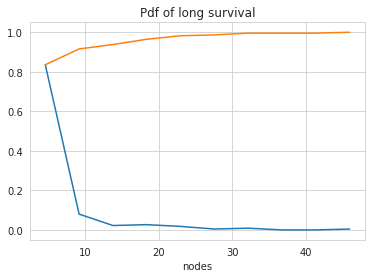

In [ ]:
#plot the CDF of nodes
counts, bin_edges = np.histogram(haberman.status_1['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges) 

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('nodes')
plt.title('Pdf of long survival')
plt.show()

Observations :

1.   There are 85% chances of survival if the number of nodes are less than 5.
2.   If the number of nodes are greater than 35 than 100% of the people have less chances of survival.

Hence we can say that if the number of nodes increases then the chances of survival decreases. 



[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


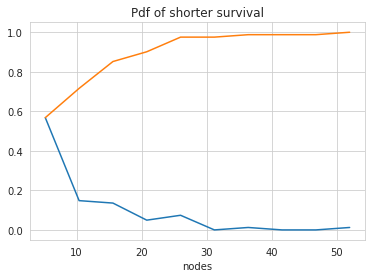

In [ ]:
counts, bin_edges = np.histogram(haberman.status_2['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('Pdf of shorter survival')
plt.xlabel('nodes')
plt.show()

Observations :

1.   There are 55% of people that have less than 5 nodes.
2.   If the number of nodes are more than 35 then the chances of survival are less.



<h1> Mean,Variance and Standard Deviation </h1>

In [ ]:
print('Means :')
print(np.mean(haberman.status_1['nodes']))
print(np.mean(haberman.status_2['nodes']))

print('\nStandard Deviations :')
print(np.std(haberman.status_1['nodes']))
print(np.std(haberman.status_2['nodes']))

Means :
2.7911111111111113
7.45679012345679

Standard Deviations :
5.857258449412131
9.128776076761632


Observations :

1.   The mean for longer survival is less and for lesser survival is more,hence the probability of lesser survival is more.
2.   The std-dev for longer survival is less and for lesser survival is more,hence the spread for lesser survival is more.



<h1>Median,Percentile,Quantile,IQR,MAD</h1>


In [ ]:
print('Medians :')
print(np.median(haberman.status_1['nodes']))
print(np.median(haberman.status_2['nodes']))

print('\nQuantiles :')
print(np.percentile(haberman.status_1['nodes'],np.arange(0,100,25)))
print(np.percentile(haberman.status_2['nodes'],np.arange(0,100,25)))

print('\n90th Percentiles :')
print(np.percentile(haberman.status_1['nodes'],90))
print(np.percentile(haberman.status_2['nodes'],90))

from statsmodels import robust
print('\nMedian Absolute Deviation')
print(robust.mad(haberman.status_1['nodes']))
print(robust.mad(haberman.status_2['nodes']))

Medians :
0.0
4.0

Quantiles :
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles :
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


Observations :

1.   The median shows that the average nodes in long survival is 0 and for short survival is 4.This means that the patients that have avg 4 nodes tends to survive less.
2.   In long survival 50th% of the nodes are 0 and 75th% of the people have less than 3 nodes
3.   In short survival 25th% of the people have 1 node,50th% have 4 nodes and 75th% have minimum 11 nodes.
4.   At 90th% the people who have long survival have 8 nodes and those who survive less have 20 nodes.



<h1>Box plot and Whiskers</h1>

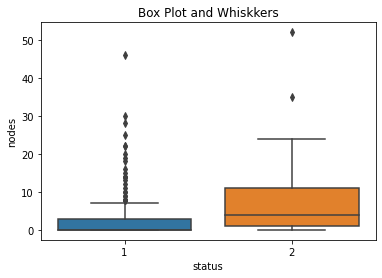

In [ ]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.title('Box Plot and Whiskkers')
plt.show()

Observations :

1.   In long survival the 25th% and 50th% are same and the threshold is from 0 to 7 nodes.
2.   In short survial its 50th% is same as the 75th% of the long survival.
3.   The threshold for short survival is from 0 to 25 nodes and its 25th% is at 1 node and 75th% is at 12 nodes. 



<h1>Voilin Plot</h1>

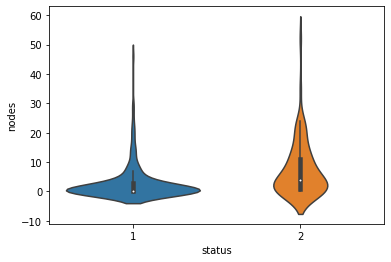

In [ ]:
#A voilin plot combines the benefits of the previous two plots and simplifies them
#Denser regions of the data are fatter, and sparser ones are thinner in a voilin plot
sns.violinplot(x='status',y='nodes',data=haberman,height=8)
plt.show()

Observations : From the above plot we can observe the following -

1.   The density near 0 is high for long survival.
2.   The density for short survival is more between 0 to 20

<h1>Multivariate probability density,Contour plot</h1>

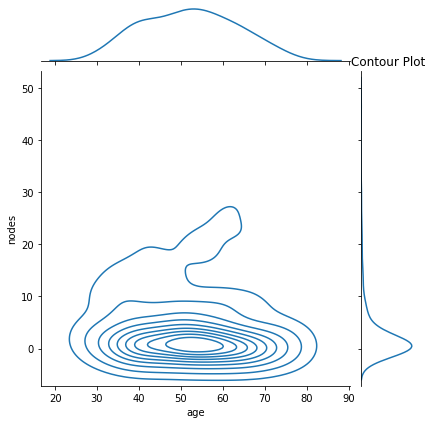

In [ ]:
#2-D density plot,contour plot
sns.jointplot(x='age',y='nodes',data=haberman.status_1,kind='kde')
plt.title('Contour Plot')
plt.show()

Observations :

1.   The contour plot for long survival with nodes and age as my features taken into consideration.
2.   The long survival density is high from age 45 to 60 and from node 0 to 2



<b>Conclusions :</b>
Having explored the Haberman's Cancer Diagnosis Dataset using various data analysis techniques,we can come up with few conclusions.

*   Out of all the given features we can say 'Nodes' is definitely the best in differentiating between the patients that will survive long as compared to those that will survive less.
*   The second best feature is 'age' of the patient and lastly is the 'year' of operation.

